(120, 4)
[5.1 2.5 3.  1.1]


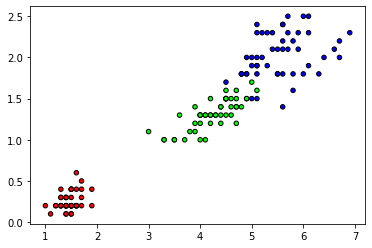

In [8]:

import numpy as np 
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape)
print(X_train[0])

plt.figure()
plt.scatter(X[:,2], X[:,3], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

In [9]:
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))


class KNN:
    def __init__(self, k=3):
        self.k = k
        
    def fit (self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict (self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
        
    def _predict(self, x):
        # we want to compute the distances
        # then get K-nearest neighbors
        # get them labels
        # then do a maturity vote - most common class label
        
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        
        #get k nearest samples, labels
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # maturity vote - most common
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
    
        

In [11]:
clf = KNN(k=3)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)